In [21]:
import pandas as pd

# URL of the raw CSV file
url = "https://github.com/kflisikowski/ds/blob/master/data6.csv?raw=true"

# Read the CSV file into a pandas DataFrame
# The 'raw=true' is important to get the raw content directly
try:
    datai = pd.read_csv(url, index_col=0) # Assuming the first column is the index
    print("Data loaded successfully:")
    print(datai.head())
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully:
      Month    Sales
1  1987 sty  1664.81
2  1987 lut  2397.53
3  1987 mar  2840.71
4  1987 kwi  3547.29
5  1987 maj  3752.96


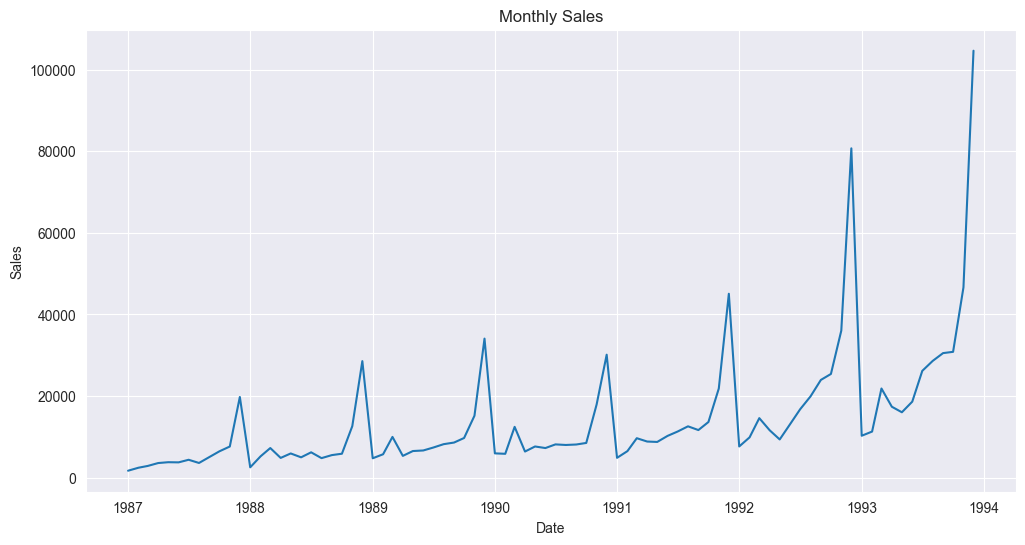

C:\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



Estimated alpha (smoothing level): 0.04
Estimated beta (smoothing trend): 0.01
Estimated gamma (smoothing seasonal): 0.96

Forecasted values:
1994-01-01     20556.064494
1994-02-01     22155.347414
1994-03-01     33071.281289
1994-04-01     29040.548756
1994-05-01     28109.769231
1994-06-01     31211.755294
1994-07-01     39125.429585
1994-08-01     41964.129405
1994-09-01     44386.660590
1994-10-01     45263.844997
1994-11-01     61437.282348
1994-12-01    105126.572577
Freq: MS, dtype: float64


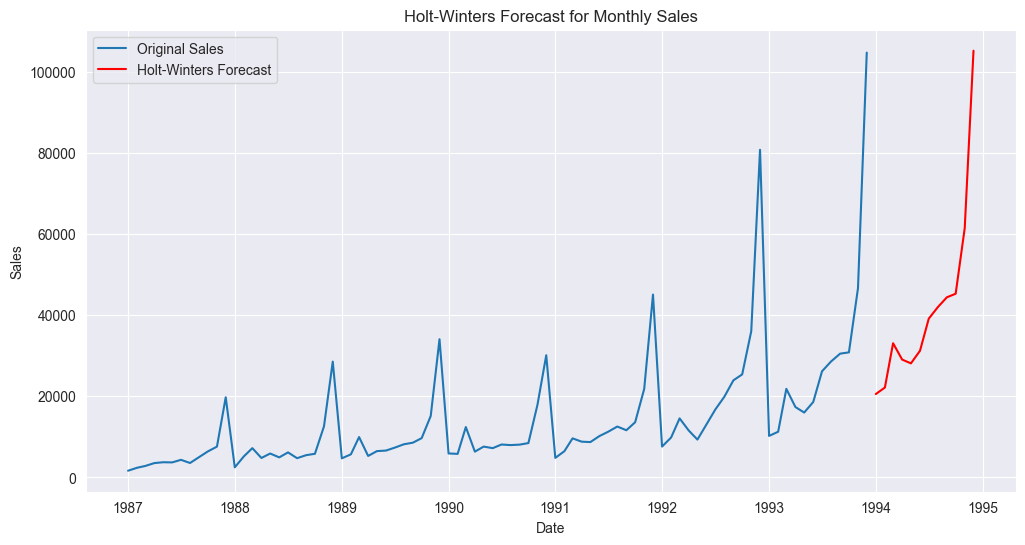

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Assuming 'monthly_sales' is the name of your sales column.
# You might need to adjust this based on the actual column name in datai.
# Let's assume the data is in a column named 'sales' for now.
# If datai has only one column, you can access it like datai.iloc[:, 0]

def to_en(string):
    mapping = {
        "sty": "Jan",
        "lut": "Feb",
        "mar": "Mar",
        "kwi": "Apr",
        "maj": "May",
        "cze": "Jun",
        "lip": "Jul",
        "sie": "Aug",
        "wrz": "Sep",
        "paź": "Oct",
        "lis": "Nov",
        "gru": "Dec"
    }
    for item in mapping.items():
        string = string.replace(*item)
    return string

# Convert the month abbreviations to full month names
datai["Month"] = datai["Month"].apply(to_en)

# Convert the index to a proper DatetimeIndex if it's not already
# Assuming the index represents months
datai.set_index("Month", inplace=True)
datai.index = pd.to_datetime(datai.index, format='%Y %b') # Adjust format if needed

# Let's rename the column to 'sales' for clarity if it's not already named
if datai.shape[1] == 1:
    datai.columns = ['sales']
else:
    # If there are multiple columns, you'll need to identify the sales column
    # For example, if it's the second column: datai.columns[1]
    # For this example, let's assume it's the first data column after index
    datai.columns = ['sales'] # Adjust if necessary

# To check for seasonality, let's plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(datai['sales'])
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# If the plot shows clear seasonality, we'll use Holt-Winters.
# You'll need to determine the 'seasonal_periods' from your data (e.g., 12 for monthly data).
seasonal_periods = 12 # Assuming monthly data with annual seasonality

# Fit Holt-Winters Exponential Smoothing model
# 'add' for additive trend/seasonality, 'mul' for multiplicative
# You might need to experiment with 'add' vs 'mul' or let the model select.
# For sales data, often multiplicative seasonality is a good fit.

# Option 1: Multiplicative trend and seasonality
fit1 = ExponentialSmoothing(datai['sales'],
                            trend='mul',
                            seasonal='add',
                            seasonal_periods=seasonal_periods).fit()

# Option 2: Additive trend and seasonality
# fit1 = ExponentialSmoothing(datai['sales'],
#                             trend='add',
#                             seasonal='add',
#                             seasonal_periods=seasonal_periods).fit()

# You can access the estimated parameters (alpha, beta, gamma)
alpha = fit1.params['smoothing_level']
beta = fit1.params['smoothing_trend']
gamma = fit1.params['smoothing_seasonal']

print(f"\nEstimated alpha (smoothing level): {alpha:.2f}")
print(f"Estimated beta (smoothing trend): {beta:.2f}")
print(f"Estimated gamma (smoothing seasonal): {gamma:.2f}")

# Forecast
forecast = fit1.forecast(steps=12) # Forecast for the next 12 months
print("\nForecasted values:")
print(forecast)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(datai['sales'], label='Original Sales')
plt.plot(forecast, label='Holt-Winters Forecast', color='red')
plt.title('Holt-Winters Forecast for Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

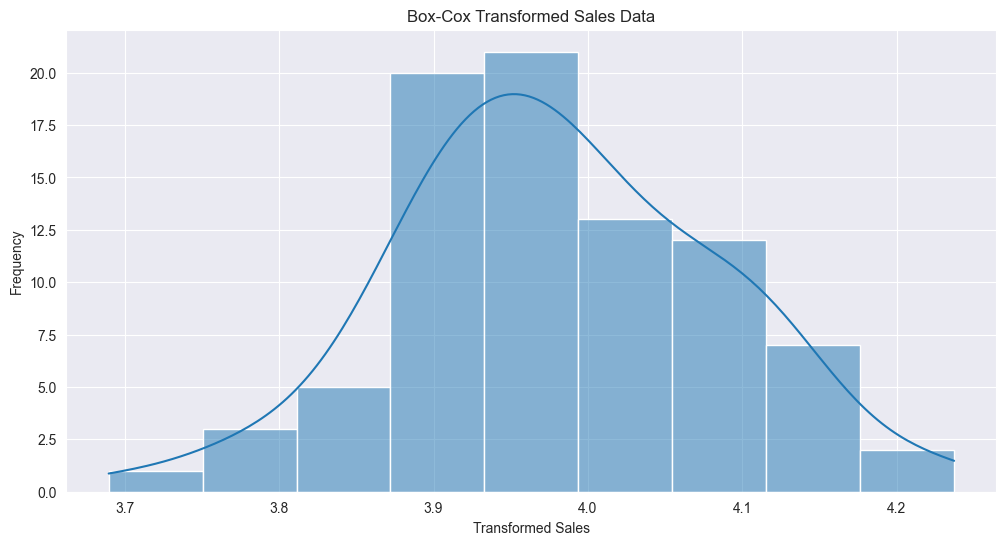

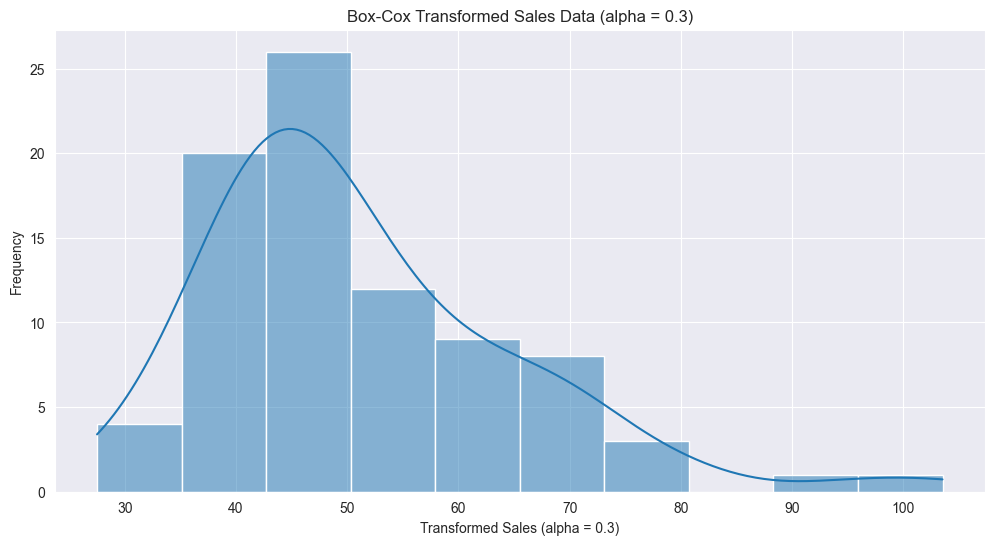

In [4]:
from scipy.stats import boxcox
import numpy as np
import seaborn as sns

# Example of Box-Cox transformation (lambda_val is alpha in the option)
transformed_sales, lambda_val = boxcox(datai['sales'])
transformed_sales_alpha_0_3 = boxcox(datai['sales'], lmbda=0.3)

# Plotting the transformed data
plt.figure(figsize=(12, 6))
sns.histplot(transformed_sales, kde=True)
plt.title('Box-Cox Transformed Sales Data')
plt.xlabel('Transformed Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Plotting the transformed data with alpha = 0.3
plt.figure(figsize=(12, 6))
sns.histplot(transformed_sales_alpha_0_3, kde=True)
plt.title('Box-Cox Transformed Sales Data (alpha = 0.3)')
plt.xlabel('Transformed Sales (alpha = 0.3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
gdp = pd.read_csv("https://github.com/kflisikowski/ds/blob/master/data7.csv?raw=true")
gdp.set_index("Year", inplace=True)
gdp = gdp[gdp.columns[1:]]
gdp

,GDP
Year,
1960,1.399507e+10
1961,8.022222e+09
1962,8.922222e+09
1963,1.035556e+10
1964,1.117778e+10
1965,1.194444e+10
1966,1.412222e+10
1967,1.566667e+10
1968,1.750000e+10


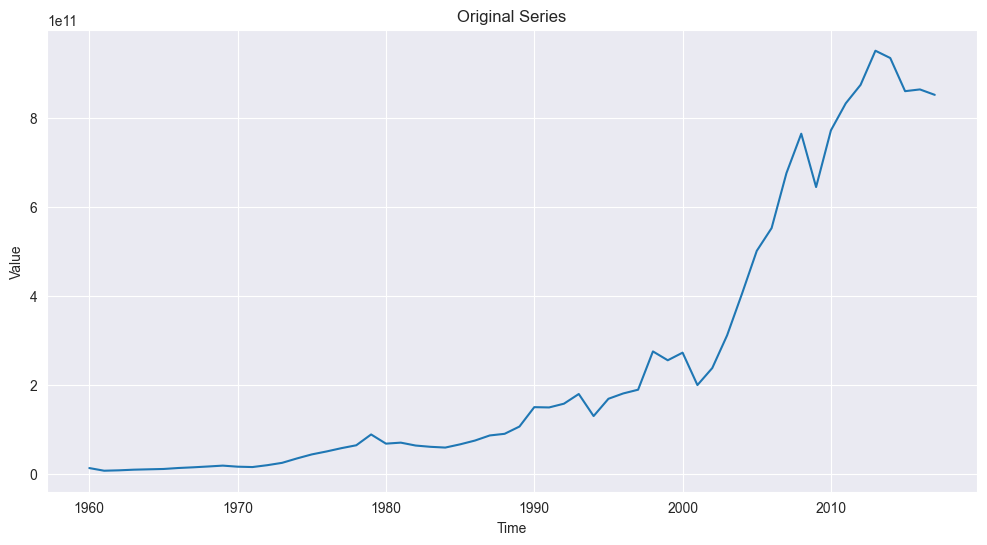


--- ADF Test on Original Series ---
ADF Statistic: 2.9404847608292335
p-value: 1.0
#Lags Used: 11
Number of Observations Used: 46
Conclusion: Series is likely Non-Stationary


In [6]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox

series = gdp

plt.figure(figsize=(12, 6))
plt.plot(series)
plt.title('Original Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# ADF test function
def adf_test(series, title='ADF Test Results'):
    print(f"\n--- {title} ---")
    result = adfuller(series.dropna()) # .dropna() in case of NaNs from differencing
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Conclusion: Series is likely Stationary")
    else:
        print("Conclusion: Series is likely Non-Stationary")

adf_test(series, 'ADF Test on Original Series')

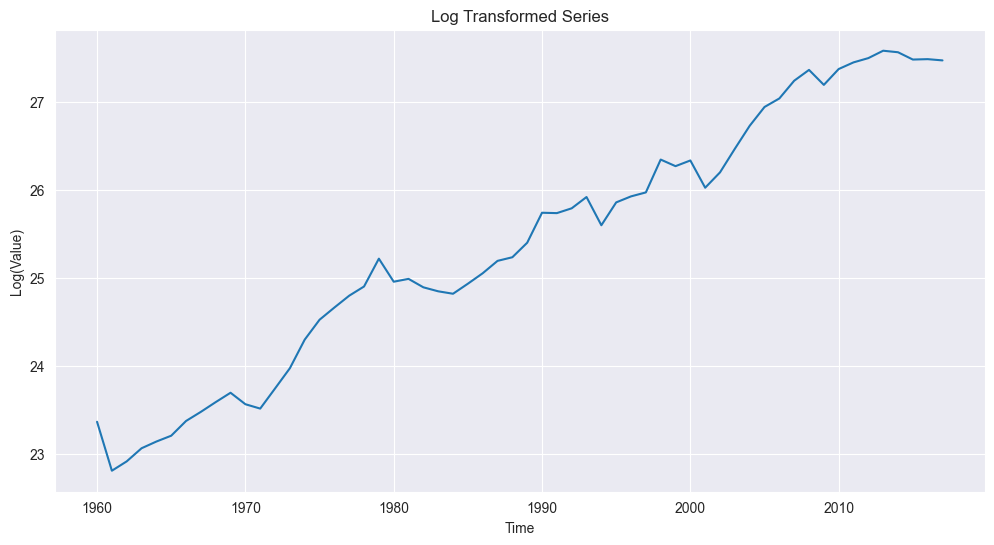


--- ADF Test on Log Transformed Series ---
ADF Statistic: -0.3796548120475273
p-value: 0.9134406770779991
#Lags Used: 0
Number of Observations Used: 57
Conclusion: Series is likely Non-Stationary

Optimal Box-Cox Lambda: 0.036


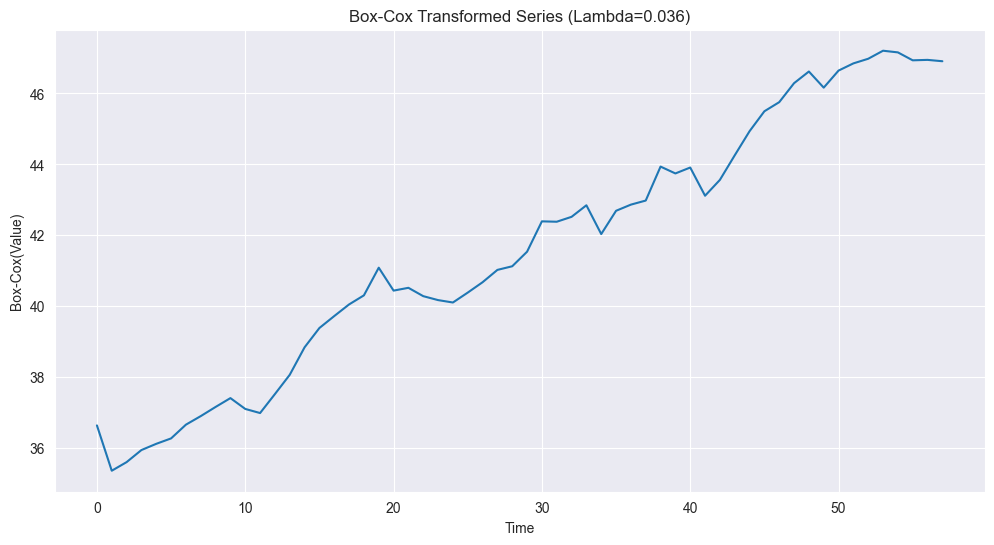


--- ADF Test on Optimal Box-Cox Transformed Series ---
ADF Statistic: -0.2865205530772337
p-value: 0.9273918479529598
#Lags Used: 0
Number of Observations Used: 57
Conclusion: Series is likely Non-Stationary


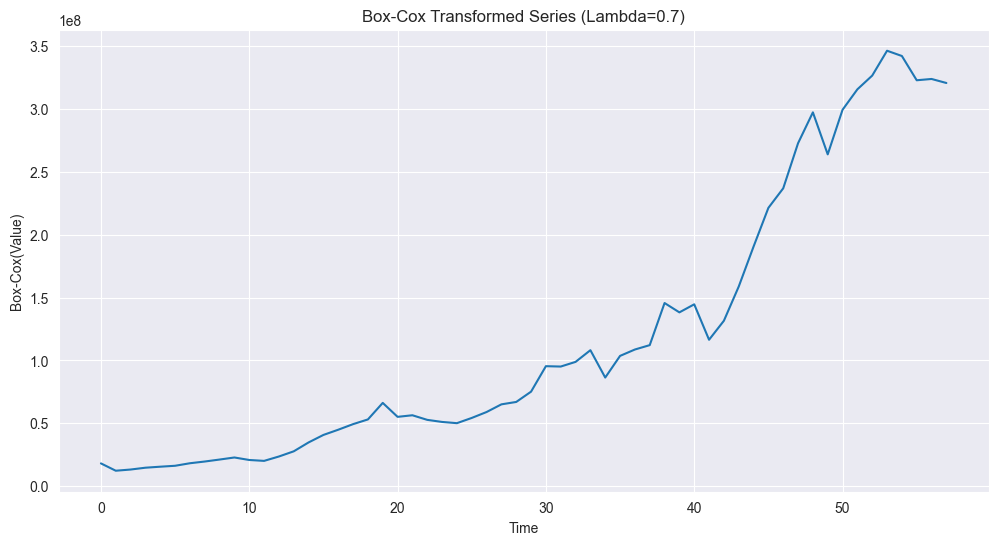


--- ADF Test on Box-Cox Transformed Series (Lambda=0.7) ---
ADF Statistic: 2.449548416961646
p-value: 0.9990317519555585
#Lags Used: 11
Number of Observations Used: 46
Conclusion: Series is likely Non-Stationary


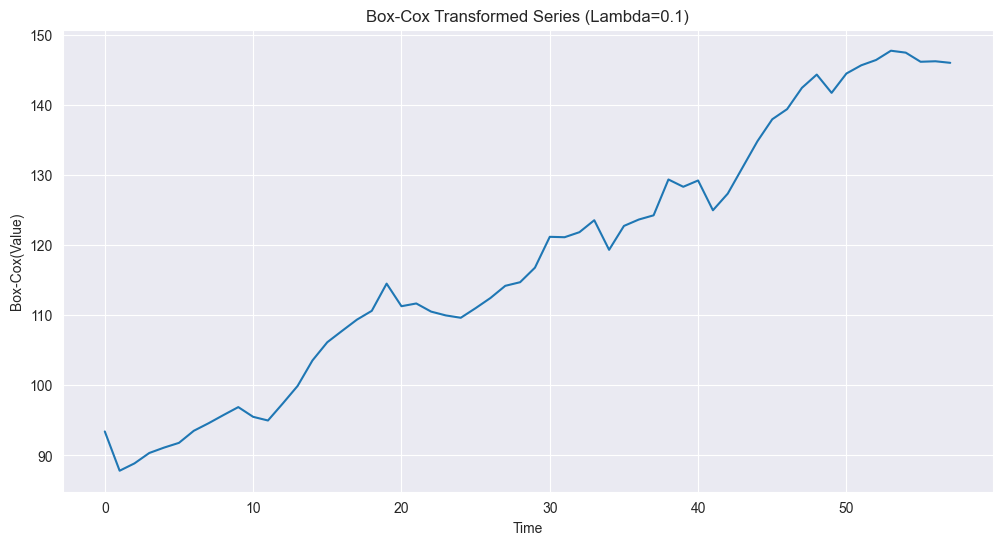


--- ADF Test on Box-Cox Transformed Series (Lambda=0.1) ---
ADF Statistic: -0.11949790374986898
p-value: 0.9474615030378855
#Lags Used: 0
Number of Observations Used: 57
Conclusion: Series is likely Non-Stationary


In [7]:
# Option 1: Log transformation
series = series["GDP"]
log_series = np.log(series)
plt.figure(figsize=(12, 6))
plt.plot(log_series)
plt.title('Log Transformed Series')
plt.xlabel('Time')
plt.ylabel('Log(Value)')
plt.grid(True)
plt.show()
adf_test(log_series, 'ADF Test on Log Transformed Series')

# Option 2: Box-Cox transformation (find optimal lambda)
# Ensure series values are positive for Box-Cox
transformed_series_bc, lambda_optimal = boxcox(series)
print(f"\nOptimal Box-Cox Lambda: {lambda_optimal:.3f}")
plt.figure(figsize=(12, 6))
plt.plot(transformed_series_bc)
plt.title(f'Box-Cox Transformed Series (Lambda={lambda_optimal:.3f})')
plt.xlabel('Time')
plt.ylabel('Box-Cox(Value)')
plt.grid(True)
plt.show()
adf_test(pd.Series(transformed_series_bc), 'ADF Test on Optimal Box-Cox Transformed Series')

# Try Box-Cox with lambda=0.7 as per option c
if (series > 0).all(): # Ensure values are positive for Box-Cox
    transformed_series_bc_0_7 = boxcox(series, lmbda=0.7)
    plt.figure(figsize=(12, 6))
    plt.plot(transformed_series_bc_0_7)
    plt.title('Box-Cox Transformed Series (Lambda=0.7)')
    plt.xlabel('Time')
    plt.ylabel('Box-Cox(Value)')
    plt.grid(True)
    plt.show()
    adf_test(pd.Series(transformed_series_bc_0_7), 'ADF Test on Box-Cox Transformed Series (Lambda=0.7)')
else:
    print("\nCannot apply Box-Cox with lambda=0.7: Series contains non-positive values.")

    # Try Box-Cox with lambda=0.1 as per option d
if (series > 0).all(): # Ensure values are positive for Box-Cox
    transformed_series_bc_0_1 = boxcox(series, lmbda=0.1)
    plt.figure(figsize=(12, 6))
    plt.plot(transformed_series_bc_0_1)
    plt.title('Box-Cox Transformed Series (Lambda=0.1)')
    plt.xlabel('Time')
    plt.ylabel('Box-Cox(Value)')
    plt.grid(True)
    plt.show()
    adf_test(pd.Series(transformed_series_bc_0_1), 'ADF Test on Box-Cox Transformed Series (Lambda=0.1)')
else:
    print("\nCannot apply Box-Cox with lambda=0.1: Series contains non-positive values.")


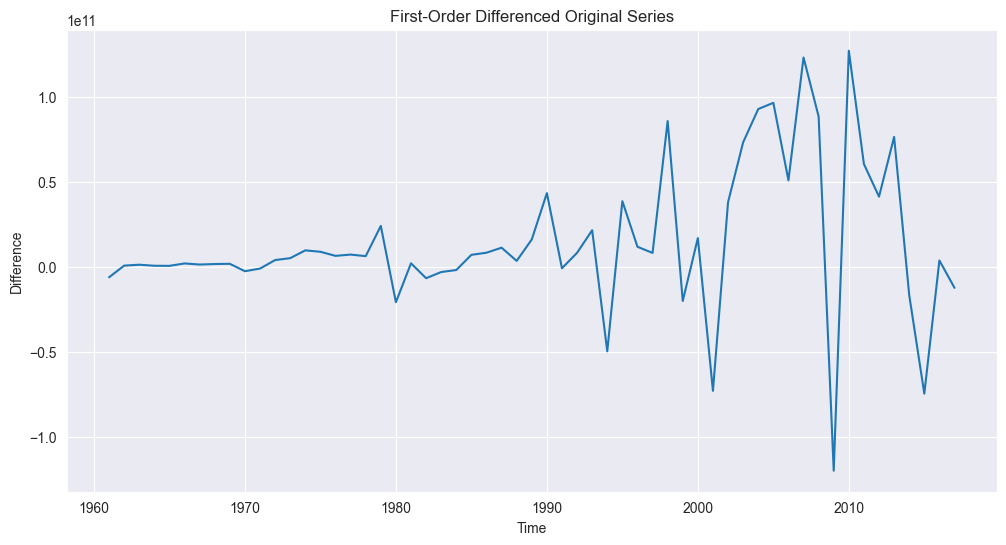


--- ADF Test on First-Order Differenced Original Series ---
ADF Statistic: -2.0437234011210426
p-value: 0.2677368760848733
#Lags Used: 11
Number of Observations Used: 45
Conclusion: Series is likely Non-Stationary


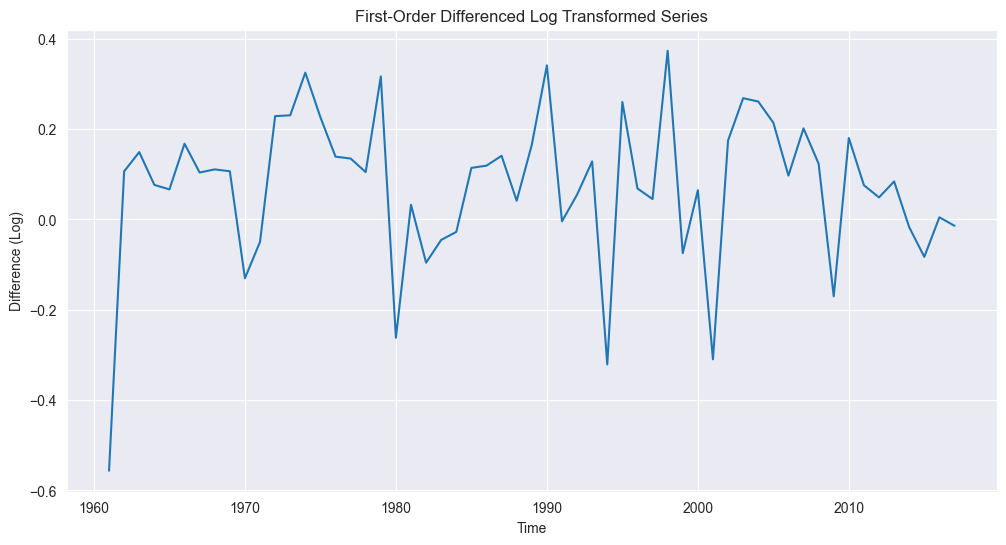


--- ADF Test on First-Order Differenced Log Transformed Series ---
ADF Statistic: -4.2865069795309845
p-value: 0.00046872837011001584
#Lags Used: 3
Number of Observations Used: 53
Conclusion: Series is likely Stationary


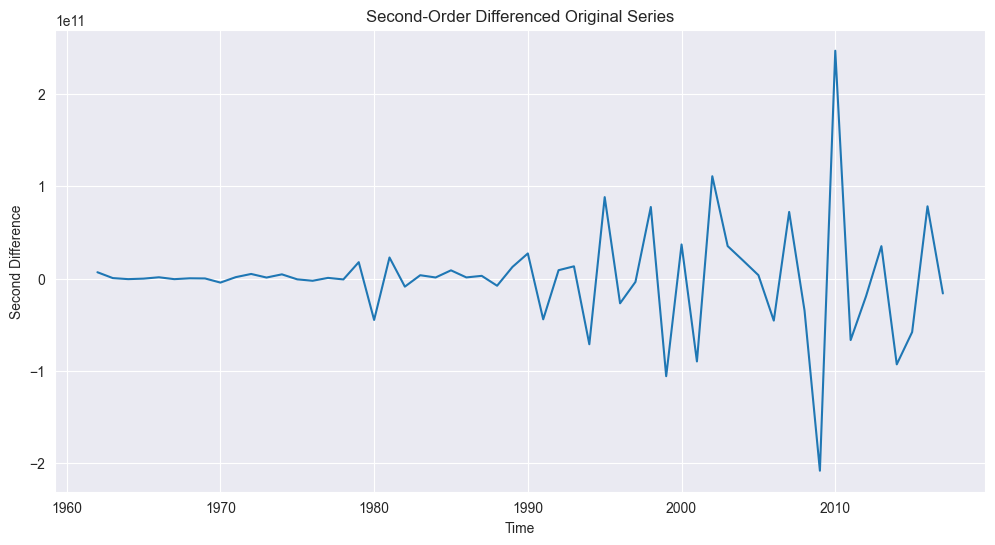


--- ADF Test on Second-Order Differenced Original Series ---
ADF Statistic: -2.4953478309515402
p-value: 0.11661035494814709
#Lags Used: 11
Number of Observations Used: 44
Conclusion: Series is likely Non-Stationary


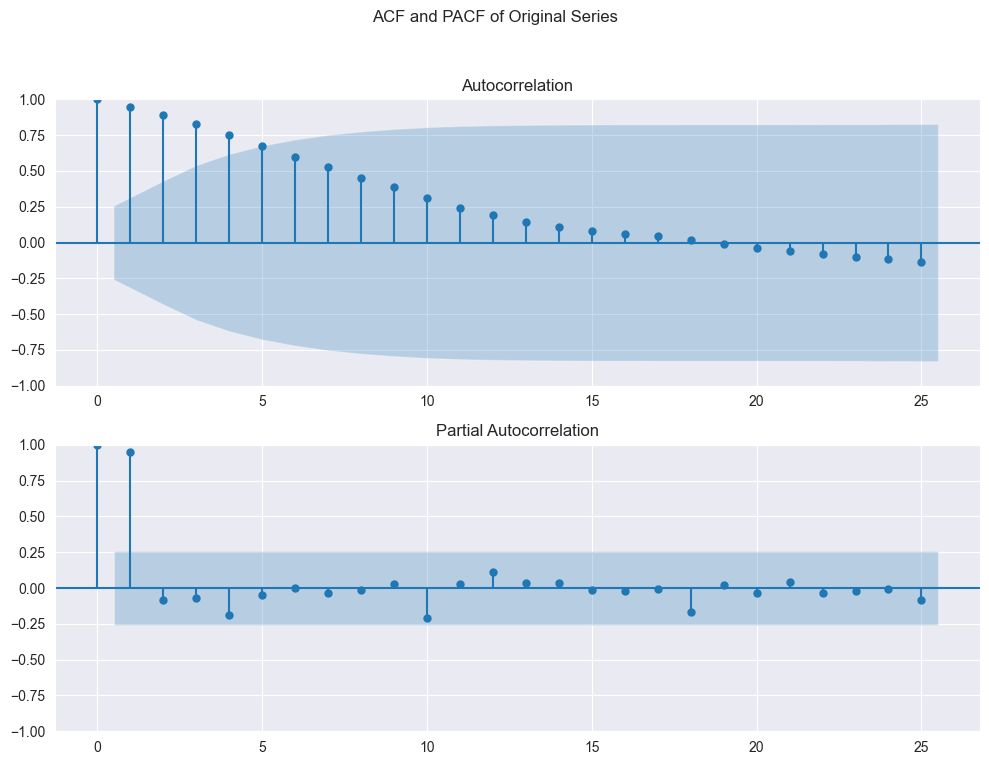

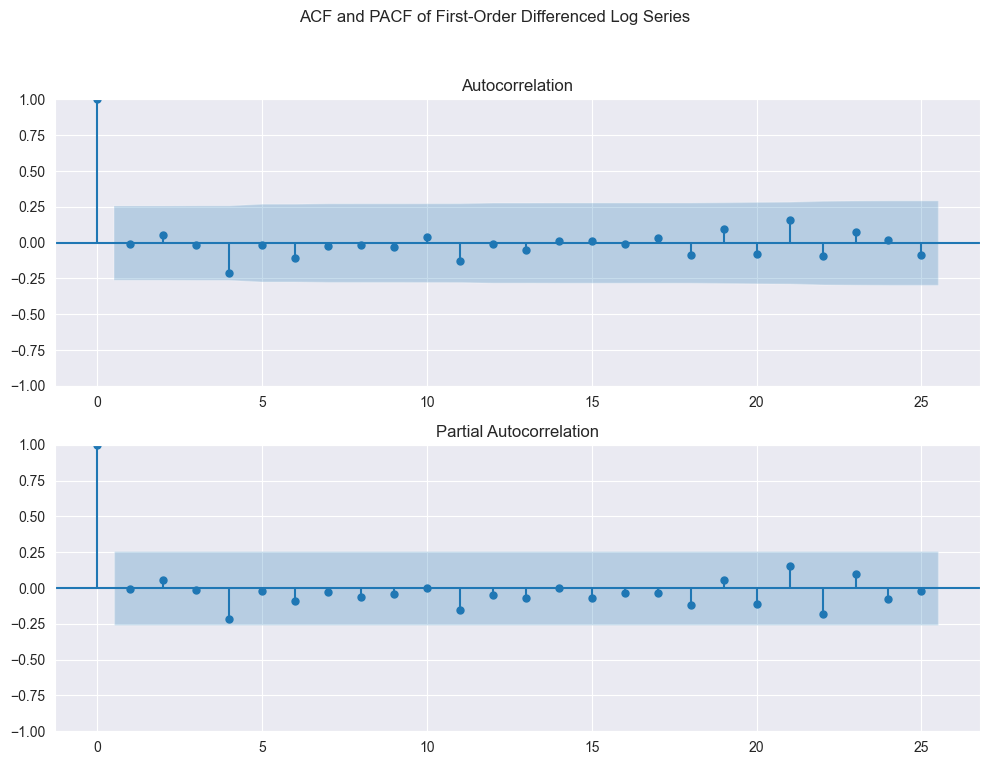

In [8]:
# Try first order differencing on original series
diff_series_1 = series.diff(1)
plt.figure(figsize=(12, 6))
plt.plot(diff_series_1)
plt.title('First-Order Differenced Original Series')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.grid(True)
plt.show()
adf_test(diff_series_1, 'ADF Test on First-Order Differenced Original Series')

# Try first order differencing on log transformed series (often combined)
diff_log_series = log_series.diff(1)
plt.figure(figsize=(12, 6))
plt.plot(diff_log_series)
plt.title('First-Order Differenced Log Transformed Series')
plt.xlabel('Time')
plt.ylabel('Difference (Log)')
plt.grid(True)
plt.show()
adf_test(diff_log_series, 'ADF Test on First-Order Differenced Log Transformed Series')

# Try second order differencing (for a quadratic trend or if first order wasn't enough)
diff_series_2 = series.diff(1).diff(1)
plt.figure(figsize=(12, 6))
plt.plot(diff_series_2)
plt.title('Second-Order Differenced Original Series')
plt.xlabel('Time')
plt.ylabel('Second Difference')
plt.grid(True)
plt.show()
adf_test(diff_series_2, 'ADF Test on Second-Order Differenced Original Series')

# Try ACF and PACF plots to help determine differencing order
# For original series
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(series.dropna(), ax=axes[0], lags=25)
plot_pacf(series.dropna(), ax=axes[1], lags=25)
plt.suptitle('ACF and PACF of Original Series')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# For first-order differenced log series
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(diff_log_series.dropna(), ax=axes[0], lags=25)
plot_pacf(diff_log_series.dropna(), ax=axes[1], lags=25)
plt.suptitle('ACF and PACF of First-Order Differenced Log Series')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Data11 loaded successfully:
         Unnamed: 0  Gas
Quarter                 
1956 Q1           1    5
1956 Q2           2    6
1956 Q3           3    7
1956 Q4           4    6
1957 Q1           5    5

Series with Datetime Index:
Quarter
1956-01-01    5
1956-04-01    6
1956-07-01    7
1956-10-01    6
1957-01-01    5
Freq: QS-JAN, Name: Gas, dtype: int64
Quarter
2009-04-01    238
2009-07-01    252
2009-10-01    210
2010-01-01    205
2010-04-01    236
Freq: QS-JAN, Name: Gas, dtype: int64


<Axes: xlabel='Quarter'>

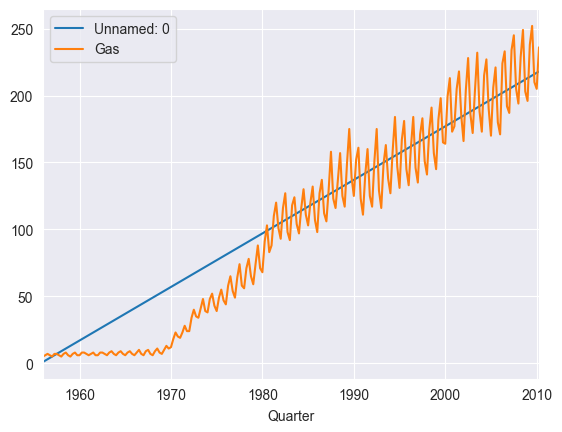

In [24]:
try:
    # Load the data, assuming the first column is the index and data is in the second column
    data11 = pd.read_csv("https://github.com/kflisikowski/ds/blob/master/data4.csv?raw=true", index_col=2)
    print("Data11 loaded successfully:")
    print(data11.head())
except Exception as e:
    print(f"Error loading data11: {e}")

# Convert the index to a proper DatetimeIndex for quarterly data
# The format is 'YYYY QX', e.g., '1981 Q1'
def parse_quarter(date_str):
    year, q_num = date_str.split(' Q')
    month = (int(q_num) - 1) * 3 + 1
    return pd.to_datetime(f'{year}-{month:02d}-01')

# Apply the parsing function to the index
data11.index = data11.index.map(parse_quarter)
data11 = data11.asfreq('QS') # Set frequency to quarterly start

series_data11 = data11['Gas']

print("\nSeries with Datetime Index:")
print(series_data11.head())
print(series_data11.tail())

data11.plot()


--- ADF Test on Original Series (data11) ---
ADF Statistic for Original Visitors: -2.24
p-value for Original Visitors: 0.19
Critical Values for Original Visitors: {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}
Conclusion: Original Visitors is likely non-stationary (fail to reject H0)


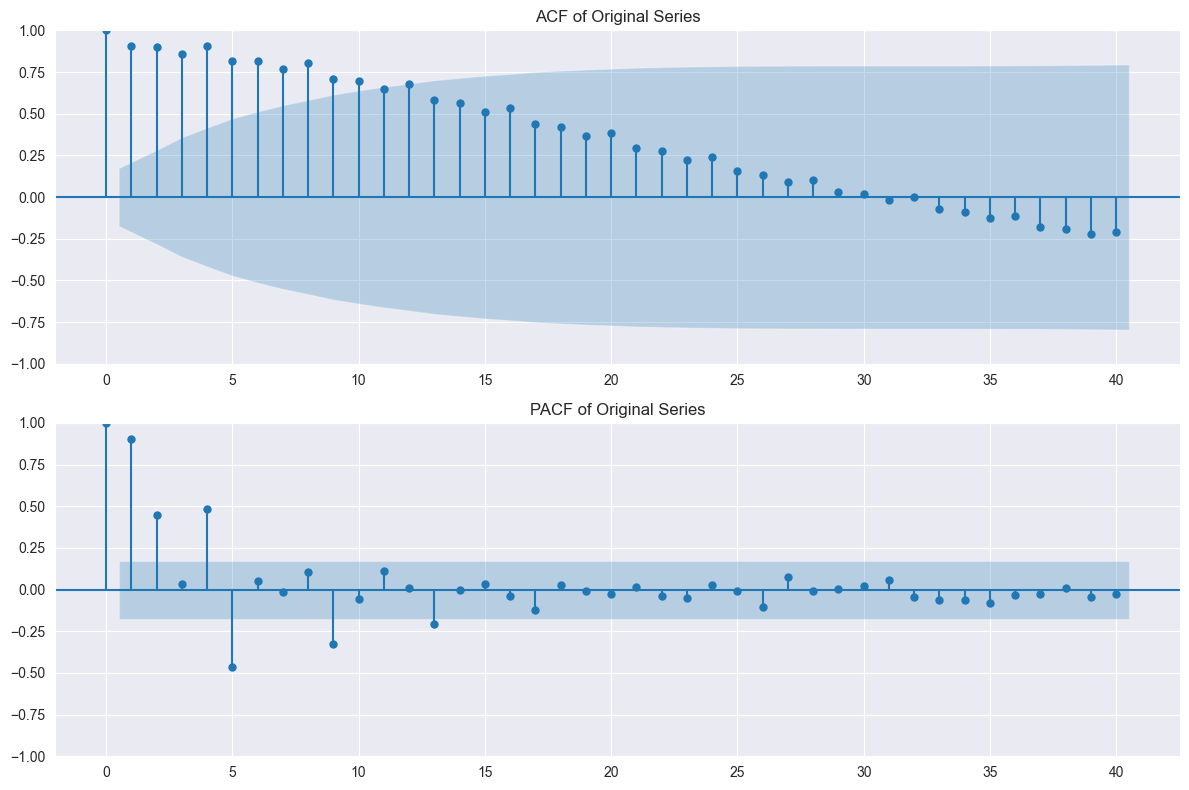

In [10]:
# ADF test on original series to confirm non-stationarity
print("\n--- ADF Test on Original Series (data11) ---")
def adf_test(series, name="Series"):
    result = adfuller(series.dropna())
    print(f'ADF Statistic for {name}: {result[0]:.2f}')
    print(f'p-value for {name}: {result[1]:.2f}')
    print(f'Critical Values for {name}: {result[4]}')
    if result[1] <= 0.05:
        print(f"Conclusion: {name} is likely stationary (reject H0)")
    else:
        print(f"Conclusion: {name} is likely non-stationary (fail to reject H0)")

adf_test(series_data11, "Original Visitors")

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(series_data11, lags=40, ax=axes[0], title='ACF of Original Series')
plot_pacf(series_data11, lags=40, ax=axes[1], title='PACF of Original Series') # typo in screenshot, should be series_data11,
plt.tight_layout()
plt.show()

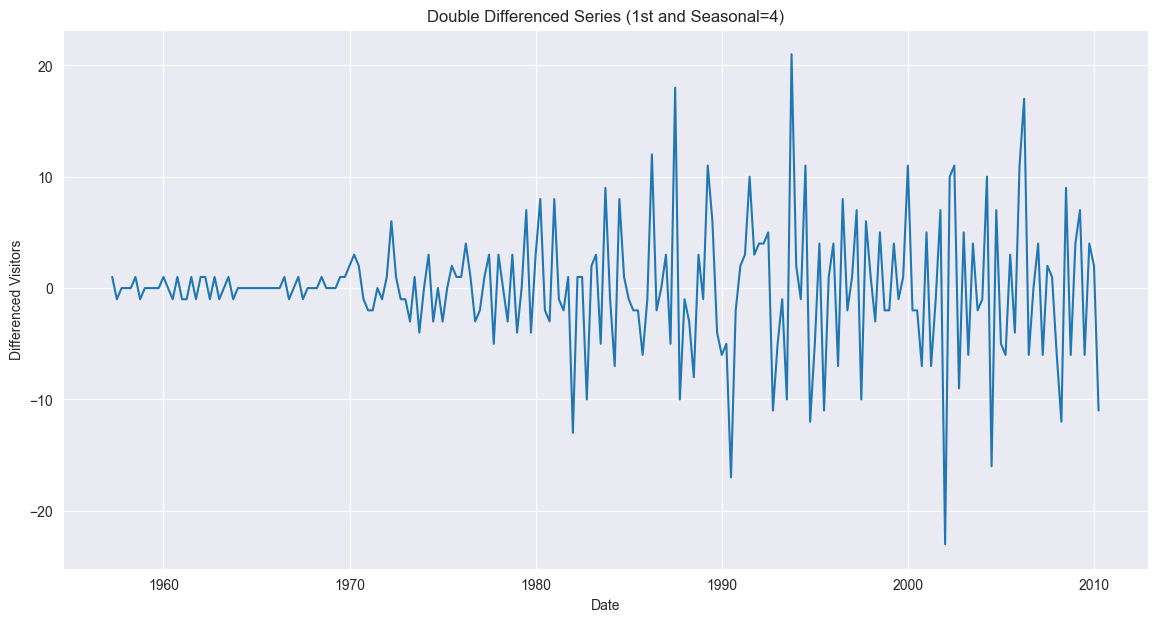


--- ADF Test on Double Differenced Series ---
ADF Statistic for Double Differenced Visitors: -9.00
p-value for Double Differenced Visitors: 0.00
Critical Values for Double Differenced Visitors: {'1%': -3.4626576734812318, '5%': -2.8757444215841326, '10%': -2.5743412314098753}
Conclusion: Double Differenced Visitors is likely stationary (reject H0)


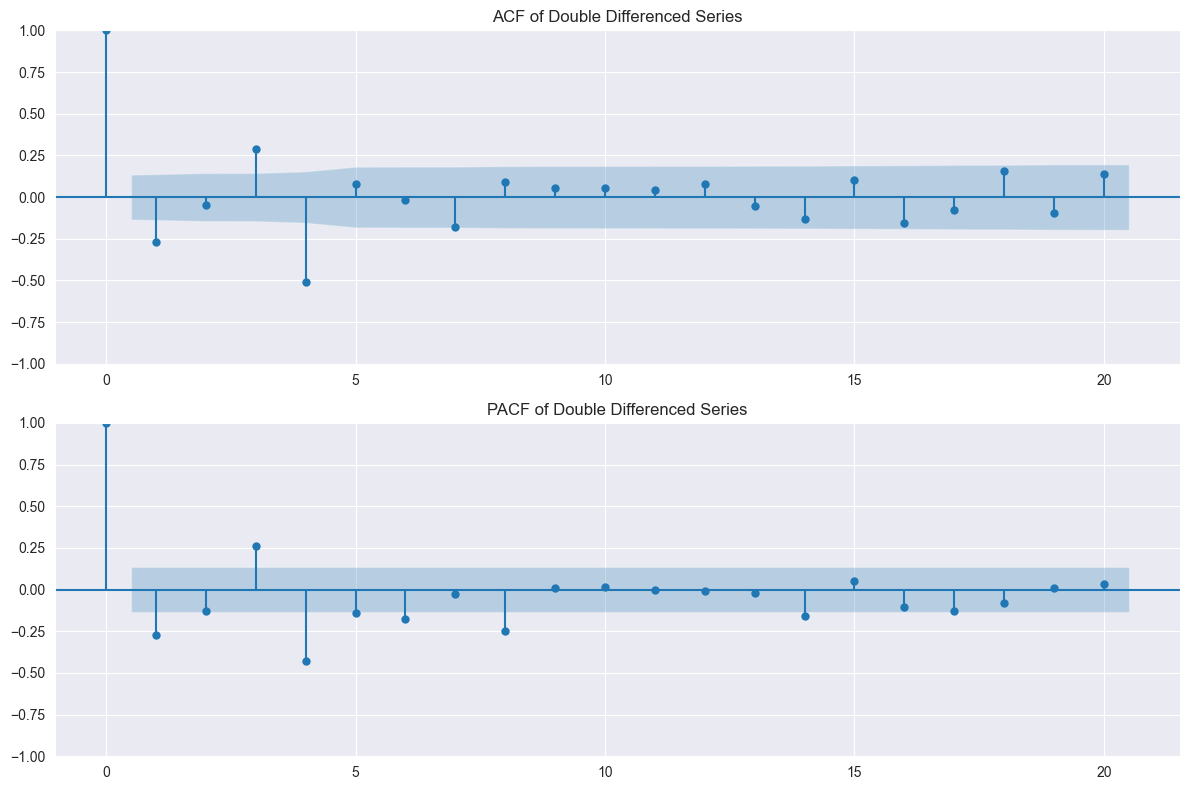

In [27]:
# First, apply seasonal differencing (lag=4 for quarterly data)
series_seasonal_diff = series_data11.diff(4)

# Then, apply first-order non-seasonal differencing
series_double_diff = series_seasonal_diff.diff(1)

plt.figure(figsize=(14, 7))
plt.plot(series_double_diff.dropna())
plt.title('Double Differenced Series (1st and Seasonal=4)')
plt.xlabel('Date')
plt.ylabel('Differenced Visitors')
plt.grid(True)
plt.show()

print("\n--- ADF Test on Double Differenced Series ---")
adf_test(series_double_diff, "Double Differenced Visitors")

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(series_double_diff.dropna(), lags=20, ax=axes[0], title='ACF of Double Differenced Series')
plot_pacf(series_double_diff.dropna(), lags=20, ax=axes[1], title='PACF of Double Differenced Series')
plt.tight_layout()
plt.show()

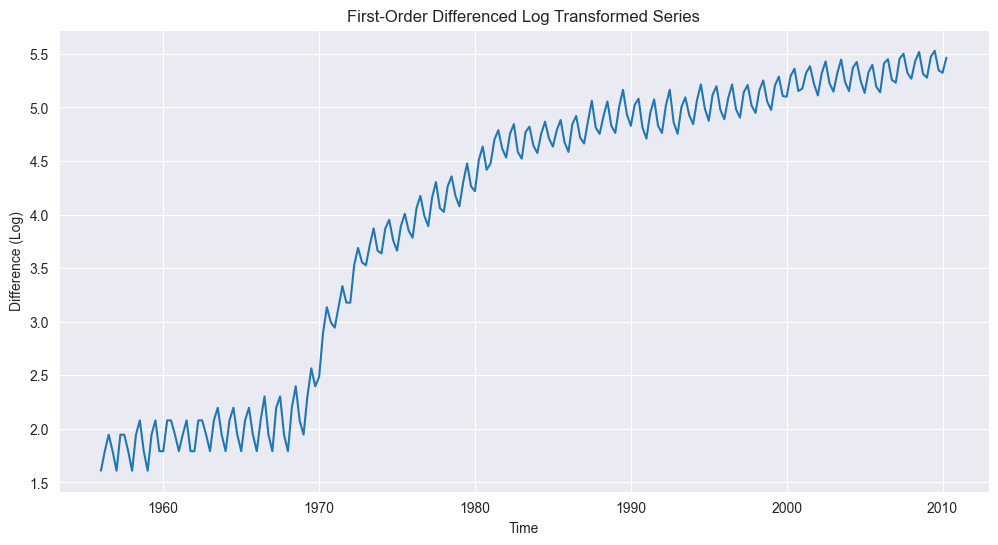

ADF Statistic for ADF Test on First-Order Differenced Log Transformed Series: -1.48
p-value for ADF Test on First-Order Differenced Log Transformed Series: 0.54
Critical Values for ADF Test on First-Order Differenced Log Transformed Series: {'1%': -3.4621857592784546, '5%': -2.875537986778846, '10%': -2.574231080806213}
Conclusion: ADF Test on First-Order Differenced Log Transformed Series is likely non-stationary (fail to reject H0)


In [25]:
diff_log_series = np.log(series_data11)#.diff(1)
plt.figure(figsize=(12, 6))
plt.plot(diff_log_series)
plt.title('First-Order Differenced Log Transformed Series')
plt.xlabel('Time')
plt.ylabel('Difference (Log)')
plt.grid(True)
plt.show()
adf_test(diff_log_series, 'ADF Test on First-Order Differenced Log Transformed Series')

In [30]:
df = pd.read_csv("https://github.com/kflisikowski/ds/blob/master/data6.csv?raw=true", index_col=0)
df

,Month,Sales
1,1987 sty,1664.81
2,1987 lut,2397.53
3,1987 mar,2840.71
4,1987 kwi,3547.29
5,1987 maj,3752.96
...,...,...
80,1993 sie,28586.52
81,1993 wrz,30505.41
82,1993 paź,30821.33
83,1993 lis,46634.38


<Axes: >

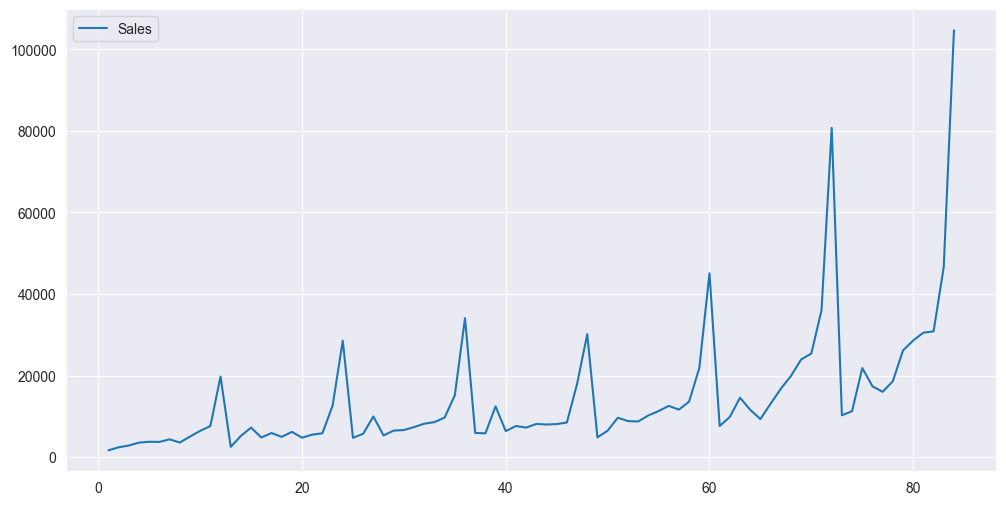

In [32]:
df.plot(y="Sales", figsize=(12, 6))

In [55]:
# Option 1: Multiplicative trend and seasonality
fit1 = ExponentialSmoothing(df['Sales'],
                            trend='mul',
                            seasonal='add',
                            seasonal_periods=12
                            ).fit()

# Option 2: Additive trend and seasonality
# fit1 = ExponentialSmoothing(datai['sales'],
#                             trend='add',
#                             seasonal='add',
#                             seasonal_periods=seasonal_periods).fit()

# You can access the estimated parameters (alpha, beta, gamma)
alpha = fit1.params['smoothing_level']
beta = fit1.params['smoothing_trend']
gamma = fit1.params['smoothing_seasonal']

print(f"\nEstimated alpha (smoothing level): {alpha:.2f}")
print(f"Estimated beta (smoothing trend): {beta:.2f}")
print(f"Estimated gamma (smoothing seasonal): {gamma:.2f}")



Estimated alpha (smoothing level): 0.04
Estimated beta (smoothing trend): 0.01
Estimated gamma (smoothing seasonal): 0.96


C:\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
